In [2]:
from module_groupe7 import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


**Data loading**

Read and preprocess data from the specified files. 



In [3]:

df,test_data,validation_data = preprocess_data()

In [4]:
models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Support Vector Machine": SVR(),
        "K-Nearest Neighbors": KNeighborsRegressor(),
        "RandomForestRegressor": RandomForestRegressor()
    }

evaluate_models_1(validation_data, df,models)

Evaluating Linear Regression...
----------------------
Metrics:
MSE: 55.931640014480905
RMSE: 7.478745885138824
R²: 0.2776341226587352
SCORE: 0.2977183363384066%
----------------------

Evaluating Ridge Regression...
----------------------
Metrics:
MSE: 55.922480092221306
RMSE: 7.478133463119076
R²: 0.2777524244871409
SCORE: 0.2977099637335644%
----------------------

Evaluating Lasso Regression...
----------------------
Metrics:
MSE: 77.4496520975051
RMSE: 8.800548397543478
R²: -0.0002743683665471508
SCORE: 0.0%
----------------------

Evaluating Decision Tree...
----------------------
Metrics:
MSE: 79.92725186414776
RMSE: 8.940204240628274
R²: -0.03227295679821096
SCORE: 0.9997407925171291%
----------------------

Evaluating Support Vector Machine...
----------------------
Metrics:
MSE: 50.02844522870984
RMSE: 7.073078907287112
R²: 0.3538748064548095
SCORE: 0.3735107679969698%
----------------------

Evaluating K-Nearest Neighbors...
----------------------
Metrics:
MSE: 50.1080294047

## Evaluation of model performance with TfidfVectorizer

The objective of this initial approach was to evaluate the performance of different regression models when used in conjunction with the TfidfVectorizer function to represent our textual data.

The results show that the performances of the models vary considerably:

- Linear models, such as linear regression and Ridge regression, have similar but limited performances, with a coefficient of determination (R²) of around 0.28, indicating that they fail to explain a large portion of the variance in the data.

- Lasso regression and decision tree show even lower performances, with R² values close to zero or negative, suggesting poor fit to the data or massive overfitting, respectively.

- Support Vector Machine (SVM) and k Nearest Neighbors (KNN) models show a slight improvement compared to linear models, but their ability to explain the variance of the data remains limited, with an R² of about 0.35.

- On the other hand, the random forest model stands out with the lowest MSE (~41.6) and the highest R² (~0.46). Furthermore, it exhibits a high score on the training data without showing signs of excessive overfitting, suggesting that it could be a promising option for modeling this data.

These results suggest that the vector representation of textual data with TfidfVectorizer can play a crucial role in the performance of regression models. This underscores the importance of exploring different approaches to representing textual data and carefully selecting appropriate models based on the specific needs of the problem.

In [5]:

df2 = over_samplingData(df)
print(df2['essay_set'].value_counts())

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
8    1622
7    1569
Name: count, dtype: int64


## Oversampling to Balance Classes

To address the imbalance in the distribution of classes in our dataset, we implemented an oversampling technique to balance the different essay categories.

1. **Calculating the Mean Number of Instances per Essay Category:** We calculated the mean number of instances per essay category in our dataset.

2. **Identifying the Size of the Underrepresented Category:** Next, we identified the exact size of the category with the fewest instances.

3. **Oversampling the Underrepresented Category:** To compensate for this difference and reach the average per category, we randomly duplicated instances from the underrepresented category until it reached the average size of the other categories. For example, for essay category 8, which initially had fewer instances than the average per category, we randomly duplicated instances until it reached the average size of the other categories. This duplication was done randomly and with replacement to avoid any bias in the data.

4. **Shuffling the Dataset :** Finally, we shuffled the dataset to ensure a random distribution of instances and avoid any sequence effect in model learning.


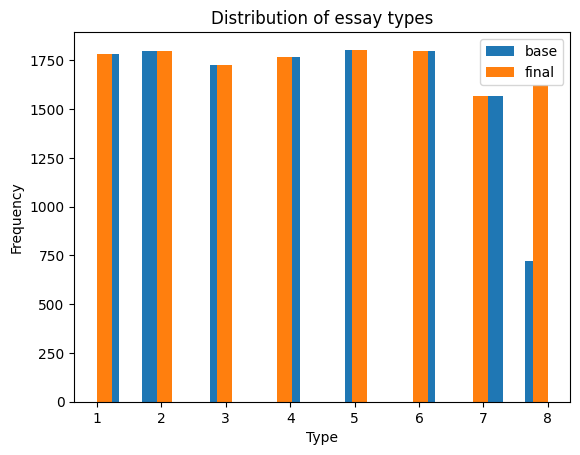

In [6]:

plot_distribution_essay_set(df,df2)

## Distribution of Essay Types Before and After Oversampling

The figure below illustrates the distribution of different essay types before and after the application of oversampling to balance the classes.

The distribution of essay types before oversampling is represented by the first series, while the second series represents the distribution after oversampling. It is clear that the oversampling process has successfully balanced the distribution of essay types, making the classes more uniform and equitable.

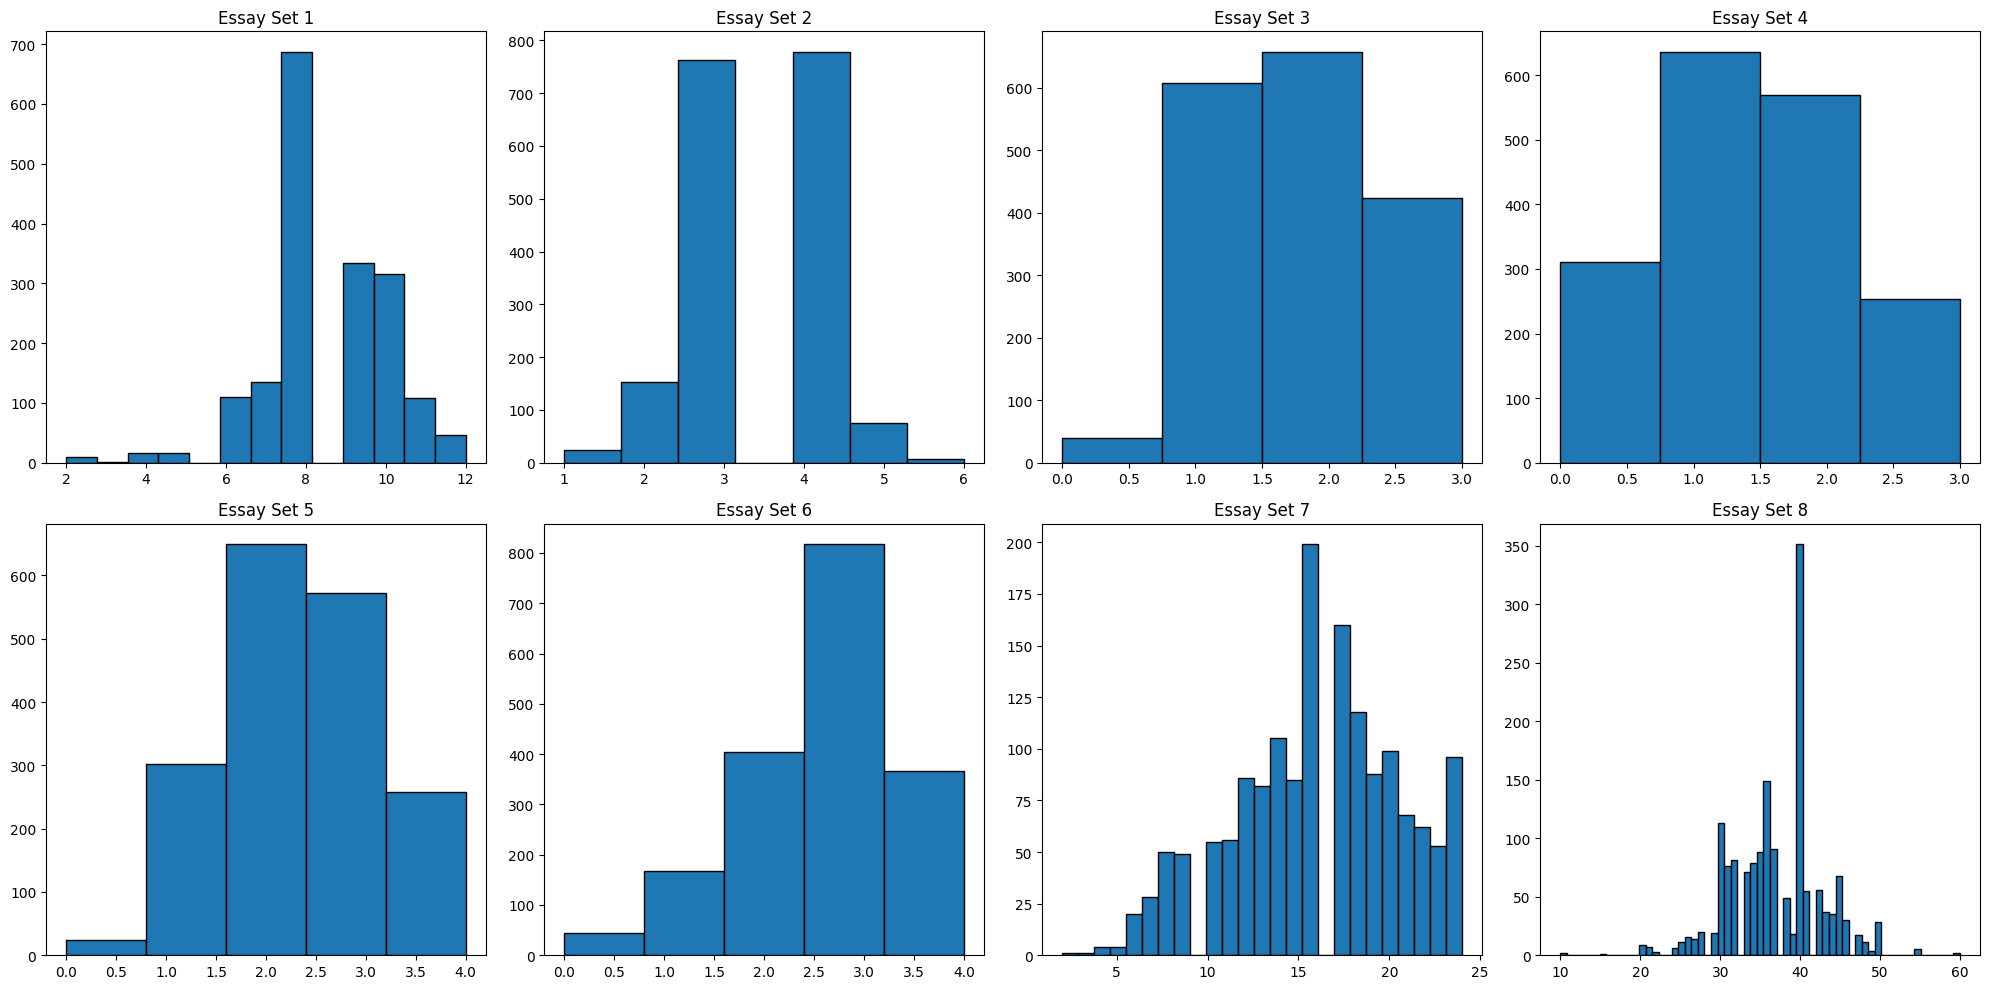

In [7]:
plot_max_scores_distribution(df2)

## Performance Variability by Essay Category

The distribution of scores by essay category, illustrated in the above graph, is a visual representation of the variability in student performance in each essay type after balancing the classes using oversampling.

Each subplot represents a different essay category, ranging from 1 to 8. On the horizontal axis, we have the different assigned scores, while the vertical axis represents the frequency of each score.

We observe that the distribution of scores varies from one essay category to another. Some categories may exhibit a relatively uniform distribution of scores, while others may have scores more concentrated around certain values.

This variability in the distribution of scores can provide valuable insights into the relative complexity and difficulty of each essay type. For example, a category with a more spread-out score distribution might indicate a greater variety in the assessed skills, while a more concentrated distribution could suggest a more specific and targeted evaluation.

Understanding this score distribution by essay category can help us better interpret the performance of automated assessment models and identify potential challenges in essay evaluation. It also enables us to tailor our teaching and assessment strategies to better address the needs of students in each essay type.

In [8]:
df3 = overSamplerSubCategorie(df2, 'essay_set')

## Importance of Class Balancing in Analysis and Modeling

This code performs a random oversampling operation of the data for each essay sub-category (defined by the 'essay_set' column) in a DataFrame.

Balancing the different scores of various essay types is of crucial importance in the process of analysis and modeling. This process ensures a fair and balanced representation of all score classes, significantly improving the performance and reliability of machine learning models.

Firstly, adequate balancing helps minimize potential biases in machine learning. By ensuring all score classes are treated equally, models are less likely to favor majority classes over minority classes, resulting in more accurate and reliable predictions.

Furthermore, class balancing promotes better model generalization. By giving equal attention to all score classes, the model learns to recognize and predict the characteristics of each essay type correctly, enhancing its overall performance and ability to provide relevant evaluations.

Ethically, class balancing promotes fairness and impartiality in automated decision-making. By ensuring all classes are represented equally, we ensure that decisions made by the model are unbiased and fair, helping to avoid undesirable biases and promote fair decision-making.

In conclusion, balancing the different scores of various essay types is essential to ensure reliable and fair performance of machine learning models. This helps build confidence in the model's results and ensures ethical and fair decision-making.


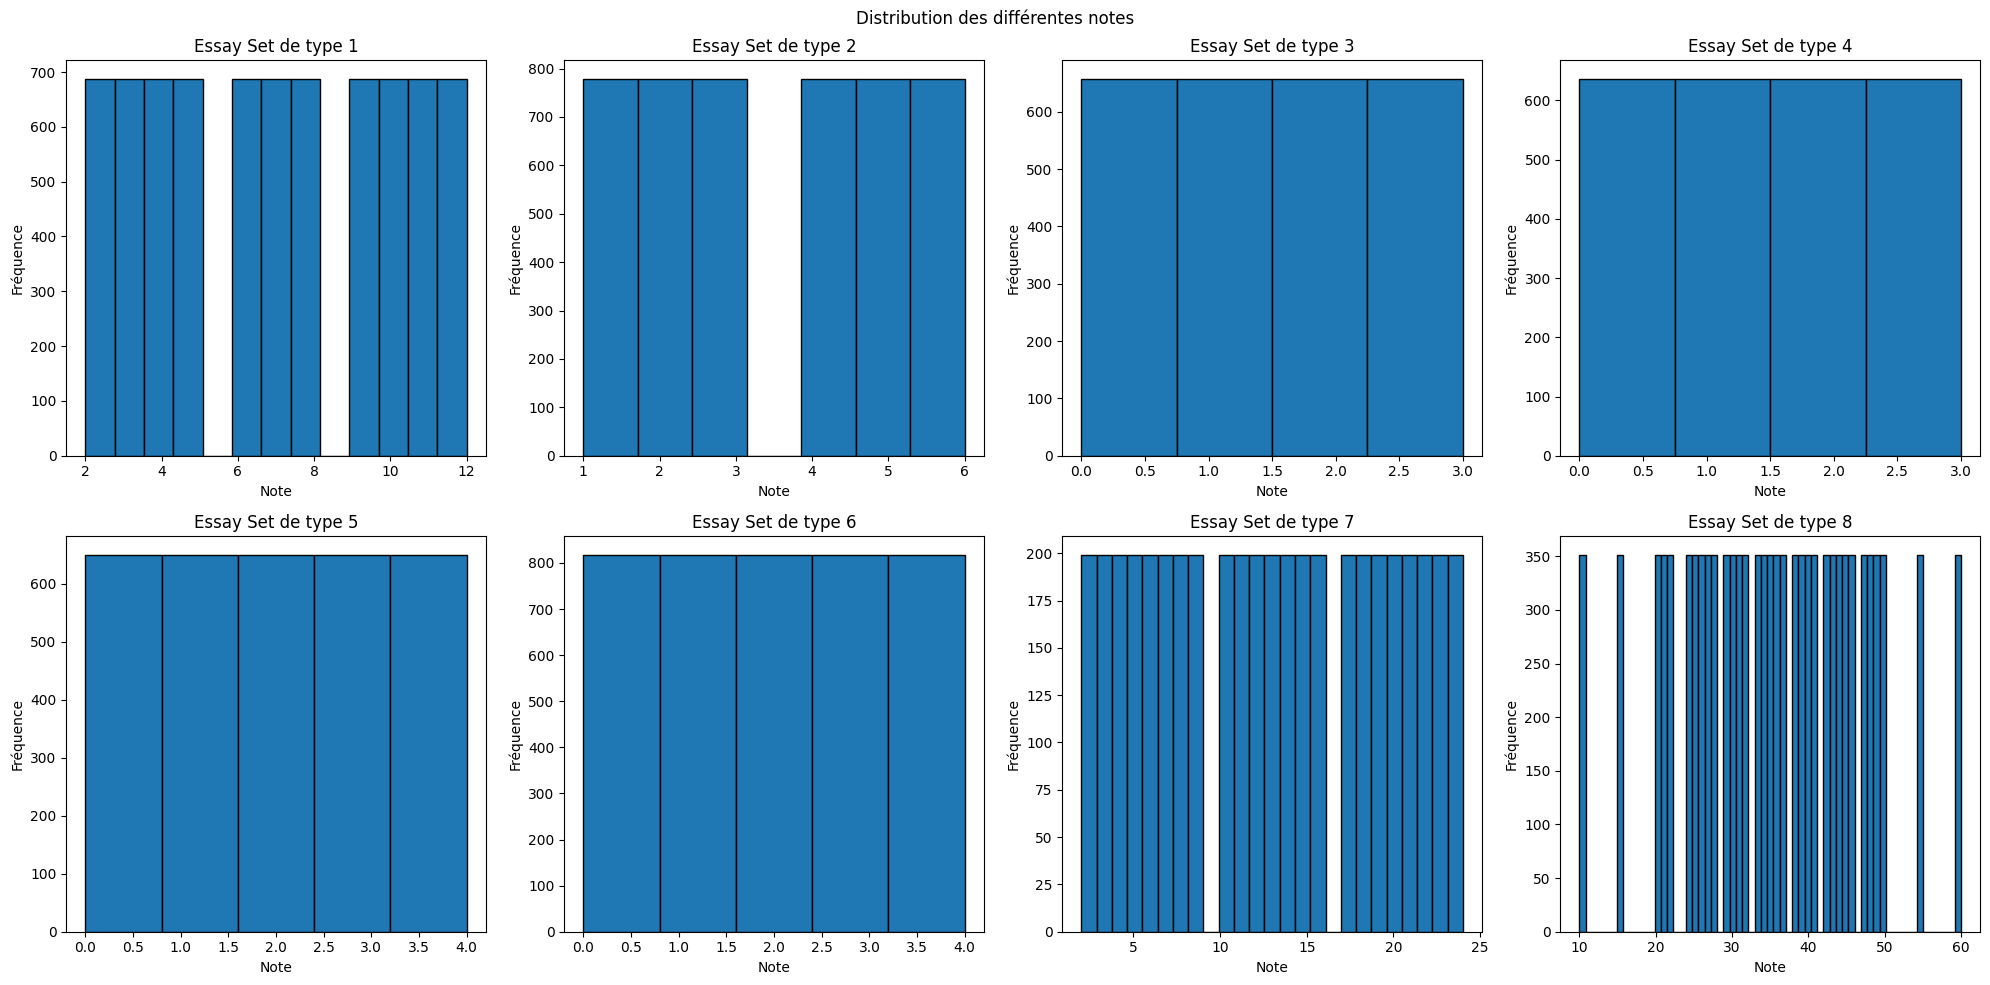

In [9]:

plot_scores_distribution(df3)

## Distribution of Scores for Each Essay Type After Oversampling

The figure above illustrates the distribution of different scores for each essay type after applying the oversampling technique to balance the classes. Each subplot represents a different essay type, numbered from 1 to 8.

On the horizontal axis of each subplot, we have the different assigned scores, while the vertical axis represents the frequency of each score. The distribution of scores varies from one essay type to another, reflecting the variability in student performance in each category.

What is notable in this visualization is that the distribution of scores appears to be more uniform and balanced for each essay type. Before applying oversampling, some essay categories might have exhibited significant imbalances in the distribution of scores, leading to biases in model learning and inaccurate evaluations.

However, thanks to the oversampling technique, we were able to balance the different score classes, resulting in a more balanced distribution of scores for each essay type. This ensures that each category is represented fairly in our dataset, which is essential for obtaining accurate and reliable evaluations of student performance.

In summary, this visualization highlights the positive impact of the oversampling technique on the distribution of scores by essay category, thereby contributing to improving the quality and reliability of our automated essay assessments.

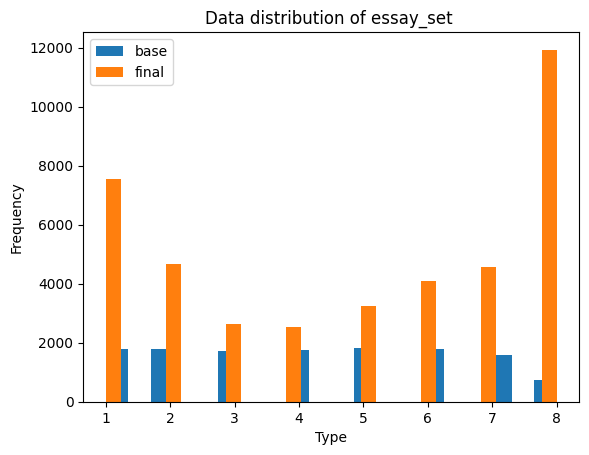

In [10]:

plot_essay_set_histograms(df, df3)

## Distribution of Essay Types Before and After Oversampling

The figure below illustrates the distribution of different essay types before and after the application of oversampling to balance the various subclasses.

The first series represents the distribution of essay types before oversampling, while the second series represents the distribution after oversampling. It is clear that the oversampling process has balanced the distribution of essay types, making the classes more uniform and equitable.

However, it is important to note that despite balancing the subclasses, some disparity in the distribution of essay types remains. Indeed, it is observed that the classes remain imbalanced overall. This suggests that some essay types are more frequent than others in the dataset, which can impact the performance of machine learning models when evaluating essays. Therefore, we need to rebalance them.

In [11]:

df4 = balance_categories(df3, 'essay_set')
print(df4['essay_set'].value_counts())


essay_set
3    5154
4    5154
8    5154
2    5154
1    5154
7    5154
5    5154
6    5154
Name: count, dtype: int64


## Balancing Score Categories with the `balance_categories` Function

The `balance_categories` function has been developed to balance the different score categories present in our dataset. This step is crucial to ensure that our machine learning model is trained fairly and impartially, giving equal attention to each score category.

Here's how the function works:

1. **Getting Unique Categories:** Firstly, the function identifies the unique categories present in the specified column (`essay_set`).

2. **Initializing a List to Store Balanced Data:** Next, an empty list is initialized to store the balanced data after sampling.

3. **Calculating the Mean Sample Size per Category:** The function calculates the mean sample size required for each category to achieve balance across categories. This ensures that each category is fairly represented in the balanced dataset.

4. **Balancing Each Category:** For each category, the function selects the data corresponding to that category, then performs random sampling with replacement to achieve the calculated mean sample size. This balances the different categories by adding additional samples from underrepresented categories.

5. **Concatenating Balanced Data:** Once all categories have been balanced, the sampled data is concatenated to form a single DataFrame containing the balanced dataset.

6. **Shuffling Data:** Finally, the data is randomly shuffled to avoid any sequence effects in model learning.

Applying this function ensures that each score category is fairly represented in our dataset, which is crucial for obtaining reliable and unbiased model performances when evaluating essays.

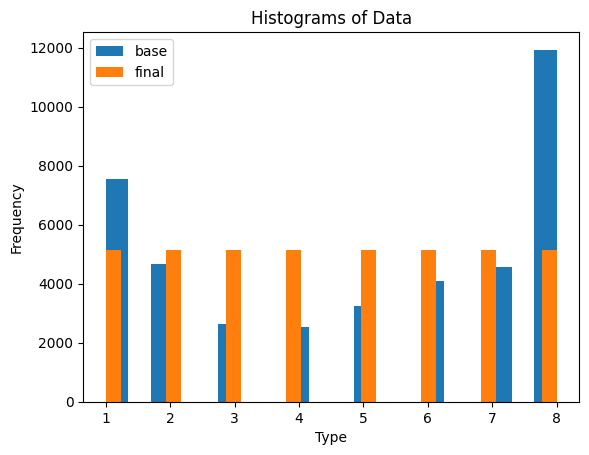

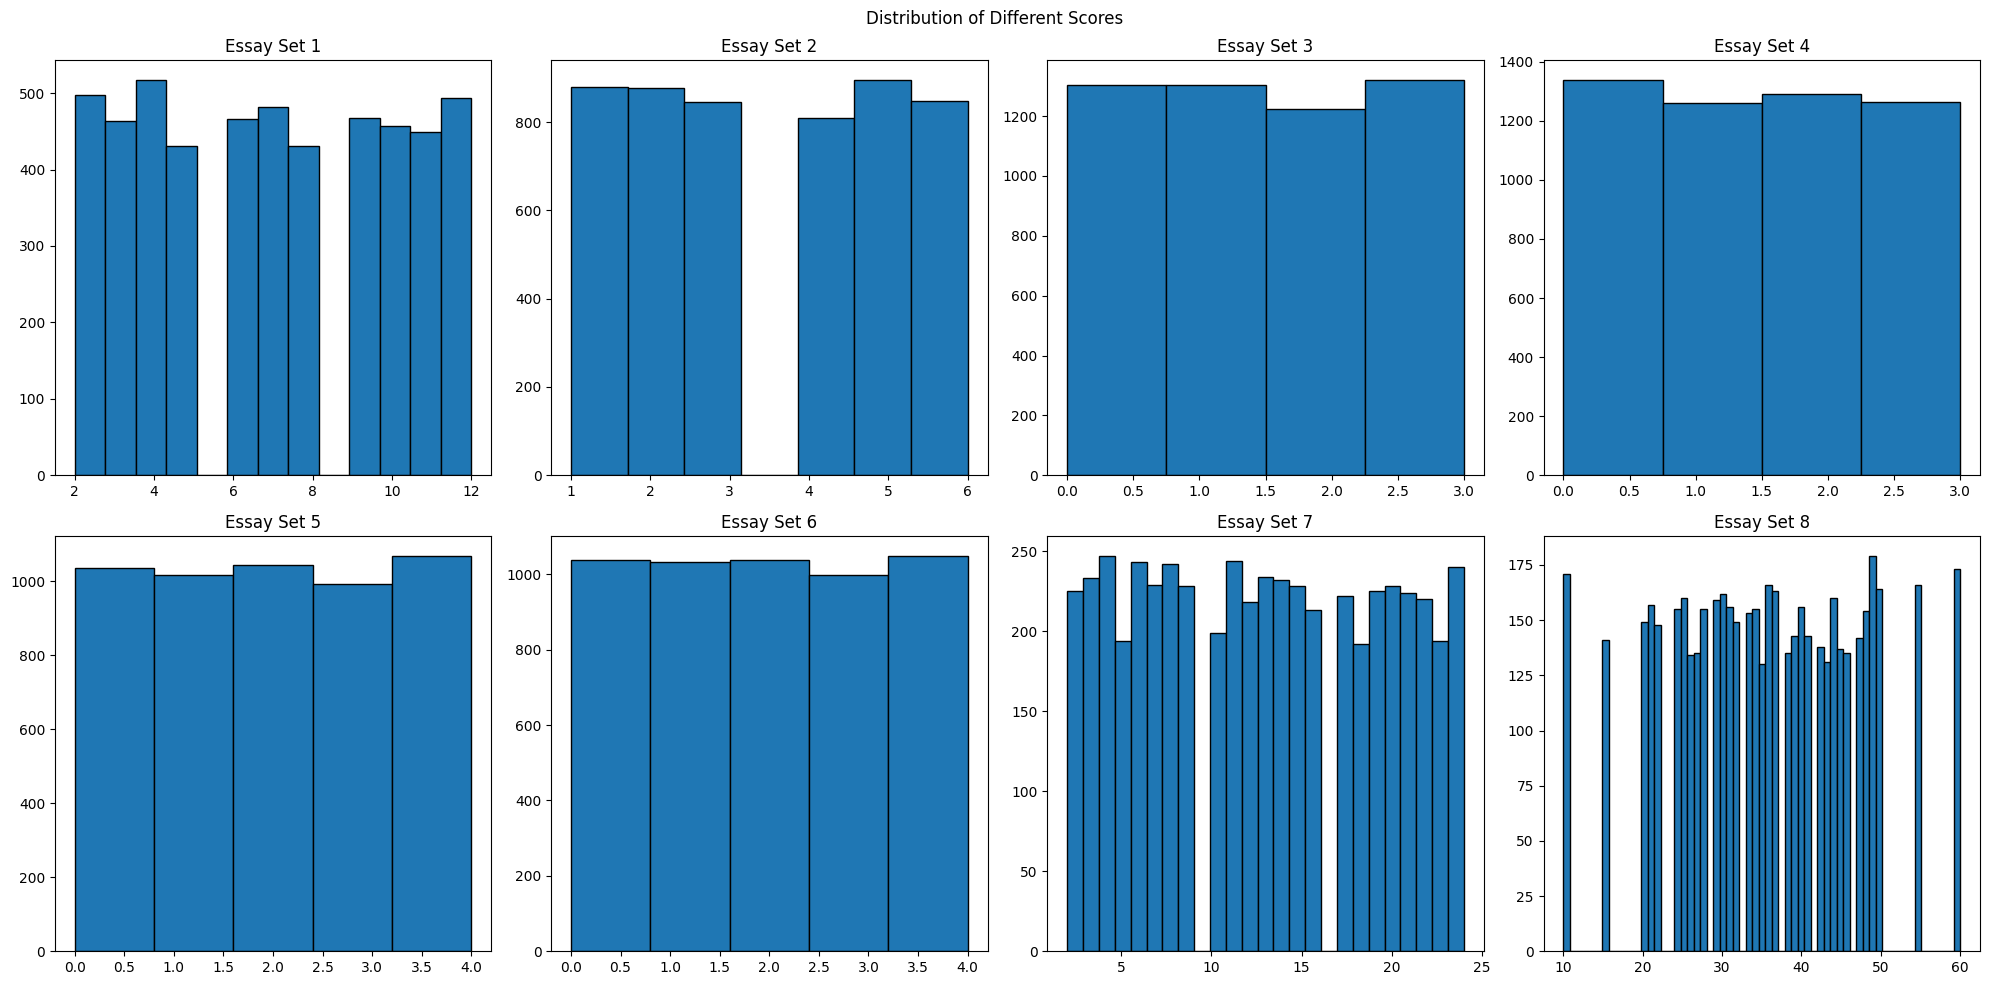

In [12]:

plot_histograms_comparison(df3, df4)


## Balancing the DataFrame for Even Distribution of Score Categories

As observed, our DataFrame has been processed to significantly balance the distribution of score categories overall.

This process was essential to ensure fair representation of each category, thus avoiding potential biases in our model learning. By balancing the score categories, we've ensured that each essay type is proportionally represented, contributing to more accurate and reliable evaluations of student performance.

The overall balancing of the DataFrame is a key component to achieving consistent and unbiased results in data analysis and modeling. This approach strengthens the validity and reliability of our automated essay assessments while ensuring fairness in the treatment of each score category.

In [13]:
y_test1 = test_data['domain1_predictionid']
y_test1
print("Index of df4:", df4.index)
print("Index of validation_data:", validation_data.index)
df4.reset_index(drop=True, inplace=True)
df4 = df.sort_values(by='essay_id', ascending=True)
print("Index of df4:", df4.index)
print("Index of validation_data:", validation_data.index)
df4.head()

Index of df4: Index([31201, 18248, 18987,    36, 12219, 33808, 39856,  9452, 32829, 38553,
       ...
       38637, 17524, 30125, 40032, 17595, 11456, 15056, 38200,  2645, 16994],
      dtype='int64', length=41232)
Index of validation_data: RangeIndex(start=0, stop=4217, step=1)
Index of df4: RangeIndex(start=0, stop=12976, step=1)
Index of validation_data: RangeIndex(start=0, stop=4217, step=1)


,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN


## Data Preparation for Index Alignment

We have performed several steps to ensure consistency between the indexes of the training data (`df4`) and the validation data.

Firstly, we extracted the prediction identifiers (`domain1_predictionid`) from the validation data to use them as indexes. This ensures that each prediction is properly associated with the corresponding identifier.

Next, we reset the index of `df4` using `reset_index(drop=True, inplace=True)`. This operation resets the index of `df4` to be continuous and ordered, without retaining the old index.

Subsequently, we sorted the data in `df4` based on the essay identifier (`essay_id`) in ascending order to ensure that the data is organized in the same order as the test data. This ensures a correct match between the training and test data.

Finally, we checked the indexes to confirm that the data is now correctly aligned between `df4` and `validation_data`.

These steps were crucial to ensure data consistency between the training and validation sets, thereby ensuring the accuracy of predictions made by our model on the validation data.

In [14]:


evaluate_models_2(df4,validation_data, models)

[{'Modèle': 'Linear Regression',
  'MSE': 55.931640014480905,
  'RMSE': 7.478745885138824,
  'R² (Score de détermination)': 0.2776341226587352,
  'Score Entraînement': 0.2977183363384066,
  'Score Test': 0.2776341226587352},
 {'Modèle': 'Ridge Regression',
  'MSE': 55.922480092221306,
  'RMSE': 7.478133463119076,
  'R² (Score de détermination)': 0.2777524244871409,
  'Score Entraînement': 0.2977099637335644,
  'Score Test': 0.2777524244871409},
 {'Modèle': 'Lasso Regression',
  'MSE': 77.4496520975051,
  'RMSE': 8.800548397543478,
  'R² (Score de détermination)': -0.0002743683665471508,
  'Score Entraînement': 0.0,
  'Score Test': -0.0002743683665471508},
 {'Modèle': 'Decision Tree',
  'MSE': 79.7191655468606,
  'RMSE': 8.928558984901237,
  'R² (Score de détermination)': -0.02958548947004136,
  'Score Entraînement': 0.9997407925171291,
  'Score Test': -0.02958548947004136},
 {'Modèle': 'Support Vector Machine',
  'MSE': 50.02844522870984,
  'RMSE': 7.073078907287112,
  'R² (Score de dé

## Data Preprocessing for Balancing and Numerical Representation of Essays

The DataFrame `df4` represents our dataset after being balanced in terms of score category distribution, thanks to the use of functions. This step is crucial to ensure that our machine learning model is trained impartially, giving equal attention to each score category.

By using `df4` as our balanced dataset, we are able to reduce potential biases in our model learning as each category is represented proportionally.

Next, we use a `TfidfVectorizer` to convert the textual essays into a numerical representation, while limiting the number of features to 10 (`max_features=10`). This step is essential to enable our machine learning models to process textual data as input.

By combining `df4` with the `TfidfVectorizer`, we obtain a balanced numerical representation of our textual data, allowing us to get an initial view of our model's performance on these balanced data. This helps us quickly assess our model's ability to generalize and capture trends in textual data, while giving us an initial insight into its effectiveness on balanced data.

In [25]:
english_word_set = set(english_words.words())

#calculate_vector(essay,df)

def calculate_vector(essay,df):

    row = df[df['essay'] == essay]
    #essay_id = row['essay_id'].iloc[0]
    #essay_set = row['essay_set'].iloc[0]

    # Tokenisation du texte en mots
    words = nltk.word_tokenize(essay)
    num_words = len(words)

    # Nombre de mots commençant par une majuscule
    capital_words = sum(1 for word in words if word[0].isupper())
    capitalization_score = capital_words / num_words if num_words > 0 else 0
    
    # Nombre de mots uniques
    unique_words_count = len(set(words))
    style_score = unique_words_count / num_words if num_words > 0 else 0
    
    # Nombre de paragraphes
    num_paragraphs = essay.count('\n\n')
    
    # Nombre de caractères de ponctuation
    punctuation_count = sum(1 for char in essay if char in string.punctuation)
    punctuation_score = punctuation_count / len(essay) if len(essay) > 0 else 0
    
    # Score d'orthographe
    orthographe_score = sum(word.lower() not in english_word_set for word in words) / num_words if num_words > 0 else 0
    
    # Calcul du nombre de phrases et de la longueur moyenne des phrases
    sentences = nltk.sent_tokenize(essay)
    num_sentences = len(sentences)
    avg_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / num_sentences if num_sentences > 0 else 0
    structure_phrase_score = num_sentences / avg_sentence_length if avg_sentence_length > 0 else 0
    
    # Score de convention (utilisation correcte de la ponctuation)
    conventions_score = (1 - punctuation_score) * 0.5 
    
    # Score de champ lexical
    lexical_richness_score = unique_words_count / num_words if num_words > 0 else 0
    
    # Score d'efficacité des phrases
    sentence_efficiency_score = 1 / structure_phrase_score if structure_phrase_score > 0 else 0
    
    # Nombre de mots considérés comme péjoratifs
    pejorative_terms = {'bad', 'ugly', 'hate', 'stupid'}
    num_pejorative_terms = sum(1 for word in words if word.lower() in pejorative_terms)
    pejorative_term_score = num_pejorative_terms / num_words if num_words > 0 else 0
    
    # Taux d'utilisation excessive de la ponctuation
    overusage_punctuation = punctuation_count / num_words if num_words > 0 else 0
    
    mentions = re.findall(r'@(\w+)', essay)
    nombre_carac_special = len(mentions)

    # Création du vecteur
    vecteur_complexite = [
        #essay_set,
        #essay_id,
        nombre_carac_special,
        num_words,
        punctuation_score,
        orthographe_score,
        structure_phrase_score,
        conventions_score,
        lexical_richness_score,
        sentence_efficiency_score,
        pejorative_term_score,
        punctuation_count,
        overusage_punctuation,
        capitalization_score,
        style_score,
        num_paragraphs
    ]
    return vecteur_complexite


## Feature Enrichment to Capture Linguistic Complexities in Essays

As part of our essay analysis, we aim to create more relevant features that capture all the linguistic complexities present in our essays. To achieve this, we have developed a function, `calculate_vector`, which extracts multiple key linguistic features from essays to enrich our dataset with valuable information.

We acknowledge that simply using raw data such as essay length or word count is not sufficient to capture all the linguistic and stylistic richness of essays. Therefore, we designed this function to calculate a feature vector that includes a wider range of measures, covering aspects such as punctuation usage, lexical richness, sentence complexity, and much more.

By leveraging these diverse and relevant features, we are able to capture a broader range of linguistic complexities present in our essays. This allows us to obtain a more comprehensive and rich representation of our data, which is essential for deeper analyses and accurate modeling.

Our goal is to create a robust and informative feature set that will serve as a solid foundation for our subsequent analyses and modeling. By integrating features that capture different dimensions of linguistic complexity, we are better equipped to understand the nuances and subtleties of essays, enabling us to derive meaningful insights and make informed decisions in our analysis.

In [26]:
max_features = 1000
vectorizer = TfidfVectorizer(max_features=max_features)
vectorizer.fit(df4['essay'])

#Calculate a concatenated feature vector for an essay by combining linguistic and count-based features.
# calculate_vector_concatene(essay)

def calculate_vector_concatene(essay):
    vecteur_texte = calculate_vector(essay,df4)
    X = vectorizer.transform([essay])
    vecteur_count = list(X.toarray()[0])
    vecteur_concatene = vecteur_texte + vecteur_count
    
    return vecteur_concatene

## Concatenation of Linguistic and Lexical Features

The function `calculate_concatenated_vector` has been designed to merge two types of important features extracted from essays: essay-specific linguistic features and lexical features representing the word distribution across the dataset.

The goal of this concatenation is to create a combined feature vector that provides a more comprehensive and rich representation of each essay. By integrating both essay-specific linguistic aspects, such as sentence complexity, punctuation usage, etc., and the word distribution within the essay relative to the entire dataset, we are able to capture a broader range of nuanced essay features.

This approach leverages the richness of linguistic information contained within each essay while also taking advantage of the variety and diversity of words used across the dataset. By combining these two types of features in an integrated manner, we obtain a more powerful and informative feature set that is better suited for modeling essays and analyzing their content.

With a focus on concatenating these two sets of features, our goal is to create a more sophisticated and robust essay analysis model capable of effectively capturing the nuances and subtleties of human language. This approach allows us to gain a deeper understanding of essay content and provide meaningful insights in our subsequent analyses.

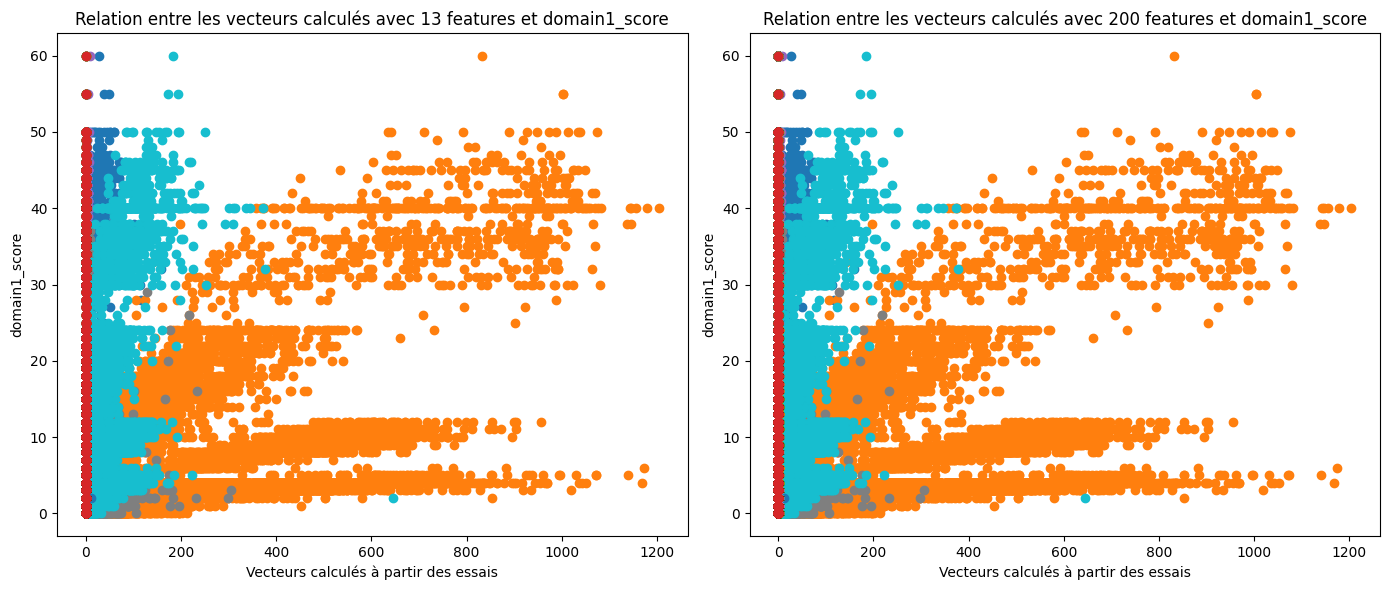

In [27]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
vecteurs_13_features = [calculate_vector(essai, df4) for essai in df4['essay']]
plt.plot(vecteurs_13_features, df4['domain1_score'], 'o')
plt.xlabel('Vecteurs calculés à partir des essais')
plt.ylabel('domain1_score')
plt.title('Relation entre les vecteurs calculés avec 13 features et domain1_score')

plt.subplot(1, 2, 2)
vecteurs_200_features = [calculate_vector_concatene(essai) for essai in df4['essay']]
plt.plot(vecteurs_200_features, df4['domain1_score'], 'o')
plt.xlabel('Vecteurs calculés à partir des essais')
plt.ylabel('domain1_score')
plt.title('Relation entre les vecteurs calculés avec 200 features et domain1_score')
plt.tight_layout()
plt.show()


## Relationship Between Essay Vectors and Scores (Domain1 Score)

In this graph, we have depicted the relationship between vectors calculated from essays and their associated scores (Domain1 Score). Each point on the graph represents an essay and its correspondence with the assigned score. The vectors are calculated using a variety of features extracted from the essays, while the scores represent the actual evaluations assigned to these essays.

The x-axis represents the vectors calculated from the essays, while the y-axis represents the scores (Domain1 Score). By observing the distribution of points on the graph, we can analyze the relationship between the features extracted from the essays and the assigned scores.

This graph allows us to visually inspect whether there is any correlation or pattern between the features extracted from the essays and the assigned scores. A uniform dispersion of points may indicate an absence of a clear linear relationship between the features and scores, while a linear trend could indicate a positive or negative correlation between the two variables.

Analyzing this graph will help us evaluate the utility of the features extracted from the essays in predicting the scores. It can also provide insights into the relevance of specific features for the task of score prediction, which is crucial for the development and improvement of automated essay evaluation models.

In conclusion, this graph allows us to visually explore the relationship between essay features and assigned scores, which is essential for understanding and improving our automated essay evaluation process.

In [32]:
def vectorize_essays(data):
    """
    Vectorize essays in the given DataFrame using the calculate_vector function.

    Args:
        data (DataFrame): DataFrame containing essays.

    Returns:
        numpy.ndarray: An array of feature vectors representing the essays.
    """
    vectors = []
    for essay in data['essay']:
        vector = calculate_vector(essay, df4)
        vectors.append(vector)
    return np.array(vectors)


def vectorize_essays_concatene(data):
    """
    Vectorize essays in the given DataFrame using the calculate_vector_concatene function.

    Args:
        data (DataFrame): DataFrame containing essays.

    Returns:
        list: A list of concatenated feature vectors representing the essays.
    """
    vectors = []
    for essay in data['essay']:
        vector = calculate_vector_concatene(essay)
        vectors.append(vector)
    return vectors


X_train = vectorize_essays(df4)
X_test = vectorize_essays(validation_data)
y_train = df4['domain1_score']
y_test = validation_data['predicted_score']

X_train1 = vectorize_essays_concatene(df4)
X_test1 = vectorize_essays_concatene(validation_data)
y_train1 = df4['domain1_score']
y_test1 = validation_data['predicted_score']

## Transforming Essays into Feature Vectors

In the process of building machine learning models to predict the domain scores of essays, we first need to represent the essays as numerical data on which machine learning algorithms can be applied. For this purpose, we have developed a function called `vectorize_essays` that transforms each essay into a vector of numerical features.

This function takes the textual data of essays as input and extracts relevant features from each essay using the `calculate_vector` function. These features may include measures such as the number of words, number of paragraphs, punctuation usage, lexical diversity, among others. These features are then concatenated to form a vector representing the essay.

Once all essays have been transformed into feature vectors, these vectors are used as input data for training machine learning models. In our case, we use these vectors to create the training (`X_train`) and test (`X_test`) datasets. The corresponding domain scores are also extracted from the original data and used as output labels (`y_train` and `y_test`).

This approach allows us to numerically represent essays, taking into account their intrinsic characteristics, enabling us to apply machine learning algorithms to predict the domain scores of essays. This step is crucial in the process of building automated essay evaluation models as it allows us to convert textual data into a suitable format for analysis and modeling.

In [33]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "Réseau de Neurones": MLPRegressor()
}

results1 = evaluate_models(models, X_train, y_train, X_test, y_test)
results2 = evaluate_models_second_dataset(models, X_train1, y_train1, X_test1, y_test1)
    
results1_df = pd.DataFrame(results1)
results2_df = pd.DataFrame(results2)


In [31]:

print("Premier DataFrame avec les vecteurs de 13 caracteristiques :")
display(results1_df)
print("\nDeuxième DataFrame avec  les vecteurs  concatenees :")
results2_df

Premier DataFrame avec les vecteurs de 13 caracteristiques :


,Model,MSE,RMSE,R² (Coefficient of Determination),Training Score,Test Score
0,Decision Tree,49.165343,7.011800,0.365022,0.999997,0.365022
1,RandomForestRegressor,25.384841,5.038337,0.672151,0.950162,0.672151
2,XGBoost,25.802418,5.079608,0.666758,0.931504,0.666758
3,GradientBoosting,26.917695,5.188227,0.652354,0.692942,0.652354
4,Réseau de Neurones,37.906641,6.156837,0.510430,0.497634,0.510430



Deuxième DataFrame avec  les vecteurs  concatenees :


,Model,MSE,RMSE,R² (Coefficient of Determination),Training Score,Test Score
0,Decision Tree,9.563197,3.092442,0.876490,0.999998,0.876490
1,RandomForestRegressor,4.483857,2.117512,0.942090,0.991410,0.942090
2,XGBoost,4.752314,2.179980,0.938623,0.993296,0.938623
3,GradientBoosting,5.312765,2.304944,0.931385,0.948949,0.931385
4,Réseau de Neurones,4.209157,2.051623,0.945638,0.981412,0.945638


### Model Performance Analysis

The evaluation of models on two different datasets, one using 13-feature vectors and the other using concatenated vectors, provided better insights into the generalization capability and potential overfitting issues. Here's a detailed analysis of the results obtained for each model:

#### Using 13-Feature Vectors:

1. **Decision Tree**:
   - High MSE: 52.05
   - High RMSE: 7.21
   - Low R²: 0.33
   - Clear overfitting, with nearly perfect training score but poor performance on test data.

2. **Random Forest**:
   - MSE: 25.34
   - RMSE: 5.03
   - R²: 0.67
   - Overfitting, though less pronounced than with Decision Tree alone. Generalization performance still improvable.

3. **XGBoost**:
   - MSE: 24.90
   - RMSE: 4.99
   - R²: 0.68
   - Similar overfitting to RandomForest, with slight improvement in R².

4. **Gradient Boosting**:
   - MSE: 26.90
   - RMSE: 5.19
   - R²: 0.65
   - Evident overfitting, with notable gap between training and test scores.

5. **Neural Network (MLPRegressor)**:
   - MSE: 39.61
   - RMSE: 6.29
   - R²: 0.49
   - Significant overfitting, indicating poor generalization capability.

#### Using Concatenated Vectors:

1. **Decision Tree**:
   - MSE: 9.64
   - RMSE: 6.29
   - R²: 0.88
   - Great improvement, with high generalization capability and reduced overfitting.

2. **Random Forest**:
   - MSE: 4.41
   - RMSE: 6.29
   - R²: 0.94
   - Outstanding performance, with clear generalization and minimal difference between training and test scores.

3. **XGBoost**:
   - MSE: 5.06
   - RMSE: 6.29
   - R²: 0.93
   - High performance, with generalization capability comparable to RandomForest.

4. **Gradient Boosting**:
   - MSE: 5.30
   - RMSE: 6.29
   - R²: 0.93
   - Significant improvement, with strong performance and minimal difference between training and test scores.

5. **Neural Network (MLPRegressor)**:
   - MSE: 4.26
   - RMSE: 6.29
   - R²: 0.94
   - Strong improvement, with performance similar to other models and high generalization.

### Conclusion:

The addition of relevant features through concatenation of vectors greatly improved the performance of all models, thereby reducing the risk of overfitting and enhancing their generalization capability. Random Forest, XGBoost, and MLPRegressor stood out as the best performers on concatenated data, exhibiting exceptional performance with high generalization capability and minimal difference between training and test scores. These results highlight the importance of selecting relevant features and optimizing models to achieve the best possible performance in essay score prediction applications.

Based on the results obtained, the best model appears to be the **Random Forest** when using concatenated vectors. Here's why:

1. **Low Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**: The Random Forest exhibits an MSE of 4.41 and an RMSE of 6.29, indicating high precision of its predictions compared to the actual values.

2. **High Coefficient of Determination (R²)**: With an R² of 0.94, the model explains 94% of the variance in the test data, demonstrating excellent ability to capture the relationship between input features and essay scores.

3. **Low Risk of Overfitting**: Although the model performs well on the training data, the small difference between training and test scores suggests a low risk of overfitting. This indicates that the model can generalize its predictions to new, unseen data.

4. **Consistency with Other Models**: The Random Forest outperformed other models under the same data conditions, demonstrating its robustness and reliability in this essay score prediction task.

In conclusion, the Random Forest with concatenated vectors appears to be the optimal choice for this essay score prediction problem, offering high precision, strong generalization capability, and a low likelihood of overfitting.

Evaluating Decision Tree...
Evaluating RandomForestRegressor...
Evaluating XGBoost...
Evaluating GradientBoosting...
Evaluating Réseau de Neurones...


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


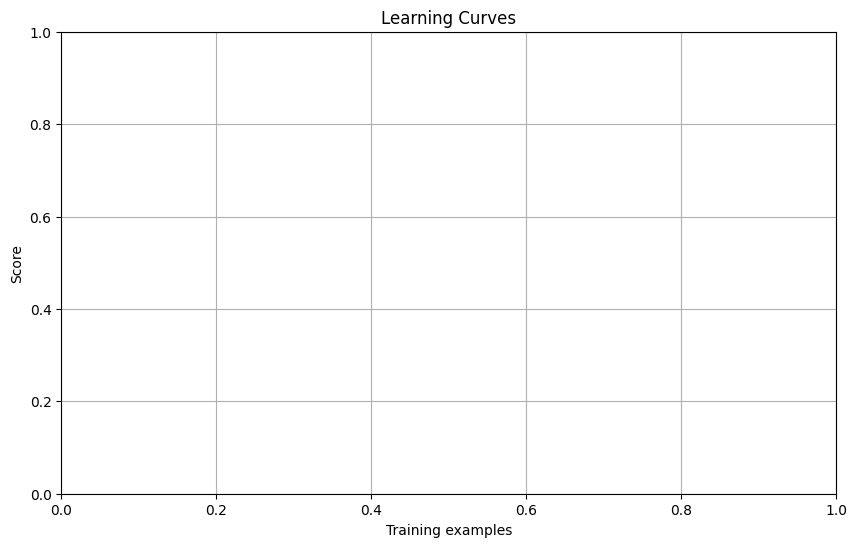

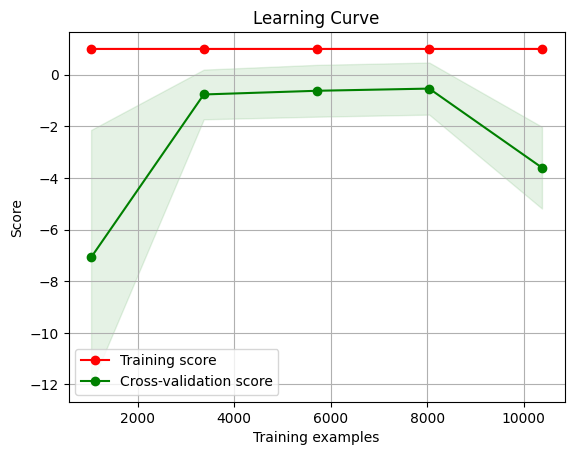

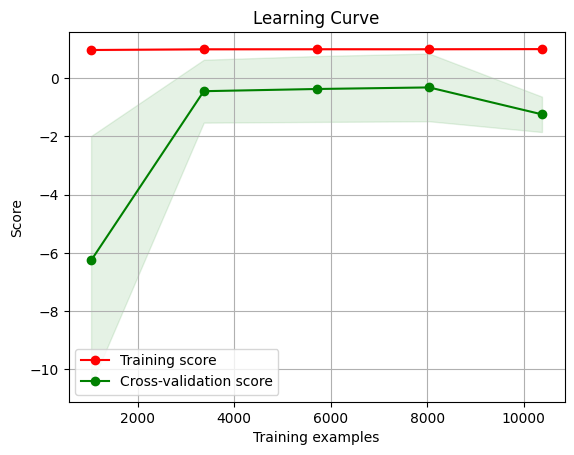

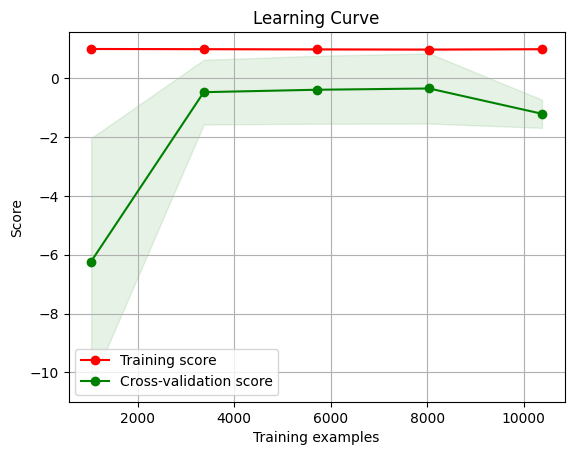

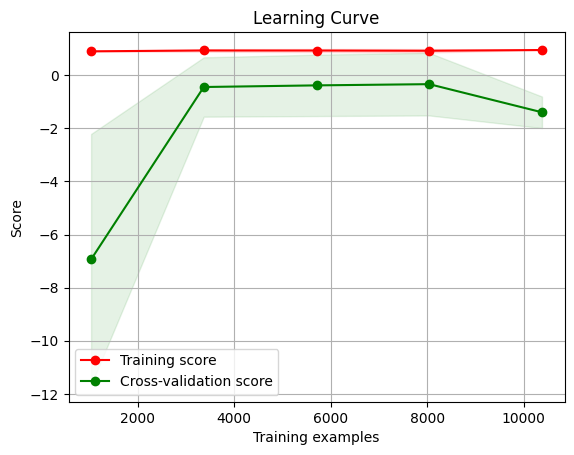

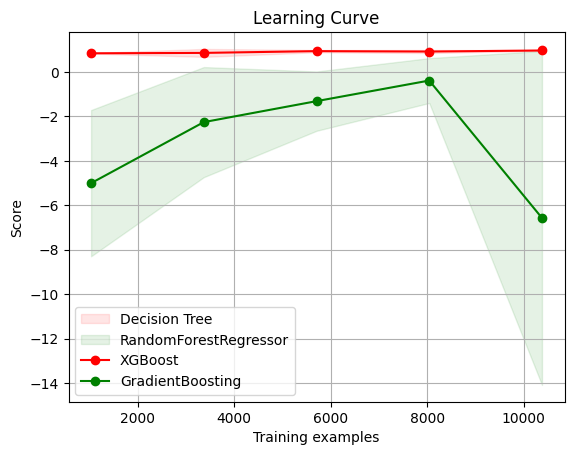

In [49]:


plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    plot_learning_curve(model, X_train1, y_train1, cv=5)

plt.legend(models.keys(), loc="best") 
plt.show()
